In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Data/2011.csv', skiprows=1, low_memory=False)
df = df.drop(columns=['id', 'member_id'])
df = df[['loan_amnt','int_rate','annual_inc', 'dti','grade']].dropna()
df.head()

,loan_amnt,int_rate,annual_inc,dti,grade
0,5000.0,0.11,24000.0,27.65,B
1,2500.0,0.15,30000.0,1.00,C
2,2400.0,0.16,12252.0,8.72,C
3,10000.0,0.13,49200.0,20.00,C
4,3000.0,0.13,80000.0,17.94,B


In [4]:
target = df["grade"]
target = target.replace(["A", "B", "C", "D", "E", "F", "G"], [0, 1, 2, 3, 4, 5, 6])
target_names = ["A", "B", "C", "D", "E", "F", "G"]


In [5]:
data = df[['loan_amnt','int_rate','annual_inc', 'dti']]
feature_names = data.columns
data.head()

,loan_amnt,int_rate,annual_inc,dti
0,5000.0,0.11,24000.0,27.65
1,2500.0,0.15,30000.0,1.00
2,2400.0,0.16,12252.0,8.72
3,10000.0,0.13,49200.0,20.00
4,3000.0,0.13,80000.0,17.94


In [6]:
print(data.shape, target.shape)

(42531, 4) (42531,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.229
k: 3, Train/Test Score: 0.543/0.269
k: 5, Train/Test Score: 0.479/0.266
k: 7, Train/Test Score: 0.439/0.273
k: 9, Train/Test Score: 0.419/0.269
k: 11, Train/Test Score: 0.402/0.274
k: 13, Train/Test Score: 0.390/0.276
k: 15, Train/Test Score: 0.381/0.274
k: 17, Train/Test Score: 0.374/0.275
k: 19, Train/Test Score: 0.370/0.282


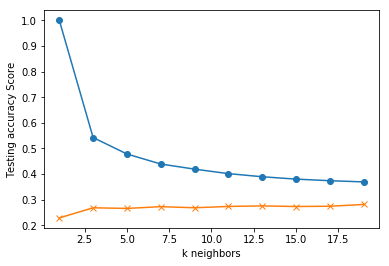

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.269


In [13]:
new_data = [[5000, .1, 100000, 50]]
predicted_class = knn.predict(new_data)
print(predicted_class)

[0]
